In [127]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
plant-disease-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [128]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plant-disease-recognition-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [199]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [200]:
np.random.seed(0)
tf.random.set_seed(0)

In [201]:
X_train_healthy_file=os.listdir('/content/Train/Train/Healthy')
X_train_powdery_file=os.listdir('/content/Train/Train/Powdery')
X_train_rust_file=os.listdir('/content/Train/Train/Rust')

In [202]:
healthy_length=len(X_train_healthy_file)
powdery_length=len(X_train_powdery_file)
rust_length=len(X_train_rust_file)

In [203]:
y_healthy=[0]*healthy_length
y_powdery=[1]*powdery_length
y_rust=[2]*rust_length

In [204]:
y_train=y_healthy+y_powdery+y_rust

In [205]:
X_test_healthy_file=os.listdir('/content/Test/Test/Healthy')
X_test_powdery_file=os.listdir('/content/Test/Test/Powdery')
X_test_rust_file=os.listdir('/content/Test/Test/Rust')

In [206]:
healthy_length=len(X_test_healthy_file)
powdery_length=len(X_test_powdery_file)
rust_length=len(X_test_rust_file)

In [207]:
y_test_healthy=[0]*healthy_length
y_test_powdery=[1]*powdery_length
y_test_rust=[2]*rust_length

In [208]:
y_test=y_test_healthy+y_test_powdery+y_test_rust

In [209]:
train_data=[]
for images in X_train_healthy_file:
  img=Image.open('/content/Train/Train/Healthy/'+images)
  img=img.resize((28,28))
  img=img.convert('RGB')
  img=np.array(img)
  img=img/255.0
  train_data.append(img)


In [210]:
for images in X_train_powdery_file:
  img=Image.open('/content/Train/Train/Powdery/'+images)
  img=img.resize((28,28))
  img=img.convert('RGB')
  img=np.array(img)
  img=img/255.0
  train_data.append(img)

In [211]:
for images in X_train_rust_file:
  img=Image.open('/content/Train/Train/Rust/'+images)
  img=img.resize((28,28))
  img=img.convert('RGB')
  img=np.array(img)
  img=img/255.0
  train_data.append(img)

In [212]:
X_train=np.array(train_data)
y_train=np.array(y_train)

In [213]:
test_data=[]
for images in X_test_healthy_file:
  img=Image.open('/content/Test/Test/Healthy/'+images)
  img=img.resize((28,28))
  img=img.convert('RGB')
  img=np.array(img)
  img=img/255.0
  test_data.append(img)


In [214]:
for images in X_test_powdery_file:
  img=Image.open('/content/Test/Test/Powdery/'+images)
  img=img.resize((28,28))
  img=img.convert('RGB')
  img=np.array(img)
  img=img/255.0
  test_data.append(img)

In [215]:
for images in X_test_rust_file:
  img=Image.open('/content/Test/Test/Rust/'+images)
  img=img.resize((28,28))
  img=img.convert('RGB')
  img=np.array(img)
  img=img/255.0
  test_data.append(img)

In [216]:
X_test=np.array(test_data)
y_test=np.array(y_test)

In [217]:
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [218]:
len(X_test)

150

In [219]:
len(y_test)

150

In [220]:
len(X_train)

1322

In [221]:
len(y_train)

1322

In [222]:
X_train.shape

(1322, 28, 28, 3)

In [256]:
model = Sequential()

In [257]:
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',input_shape=(28,28,3)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,(2,2),activation='relu'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [258]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [259]:
history=model.fit(X_train,y_train,epochs=15,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/15
42/42 [==============================] - 2s 10ms/step - loss: 1.0840 - accuracy: 0.3918 - val_loss: 1.0241 - val_accuracy: 0.5133
Epoch 2/15
42/42 [==============================] - 0s 6ms/step - loss: 0.8196 - accuracy: 0.6089 - val_loss: 0.7607 - val_accuracy: 0.6267
Epoch 3/15
42/42 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.6838 - val_loss: 0.7713 - val_accuracy: 0.6067
Epoch 4/15
42/42 [==============================] - 0s 5ms/step - loss: 0.6067 - accuracy: 0.7224 - val_loss: 0.7523 - val_accuracy: 0.6533
Epoch 5/15
42/42 [==============================] - 0s 6ms/step - loss: 0.4766 - accuracy: 0.8041 - val_loss: 0.6122 - val_accuracy: 0.7333
Epoch 6/15
42/42 [==============================] - 0s 6ms/step - loss: 0.4288 - accuracy: 0.8253 - val_loss: 0.6695 - val_accuracy: 0.7467
Epoch 7/15
42/42 [==============================] - 0s 6ms/step - loss: 0.3435 - accuracy: 0.8661 - val_loss: 0.6109 - val_accuracy: 0.7800
Epoch 8/15
42/42 [=

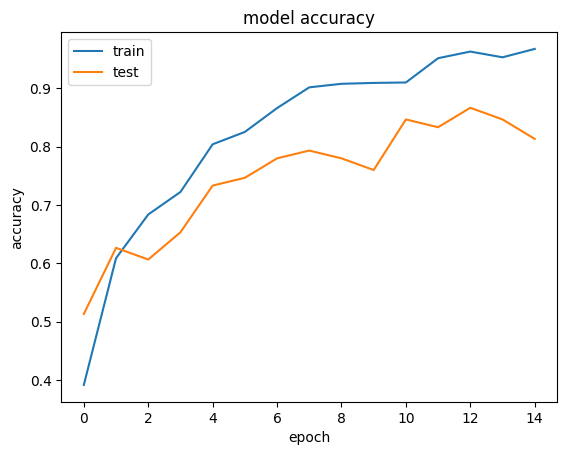

In [260]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [261]:
def prediction(image):
  image=Image.open(image)
  image=image.resize((28,28))
  image=image.convert('RGB')
  image=np.array(image)
  image=image/255.0
  image=np.expand_dims(image,axis=0)
  prediction=model.predict(image)
  predict=prediction.argmax()
  if predict==0:
    print('Healthy')
  elif predict==1:
    print('Powdery')
  else:
    print('Rust')

In [273]:
prediction('/content/Validation/Validation/Rust/963ffc6b98d60940.jpg')

1/1 [==============================] - 0s 18ms/step
Rust
